In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import utils
import pandas as pd
from tensorflow.keras import models
from tensorflow.keras.datasets import mnist
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt


In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train_scaled = x_train.astype('float32') / 255.
x_test_scaled = x_test.astype('float32') / 255.

In [ ]:
x_train_scaled = np.reshape(x_train_scaled, (len(x_train_scaled), 28, 28, 1))
x_test_scaled = np.reshape(x_test_scaled, (len(x_test_scaled), 28, 28, 1))

In [ ]:
noise_factor = 0.5
x_train_noisy = x_train_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train_scaled.shape)
x_test_noisy = x_test_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test_scaled.shape)

In [ ]:
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

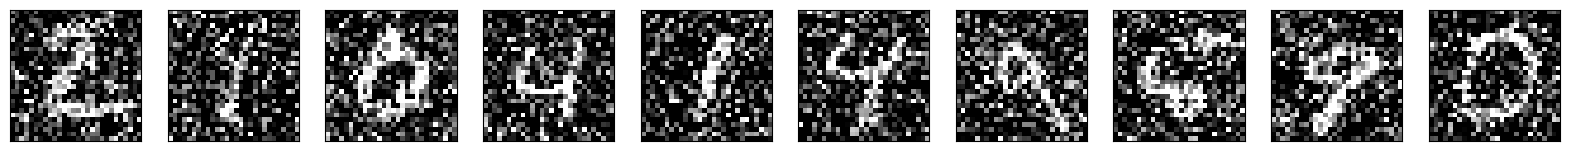

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
print("Name:PAVITHRA R")
print("Register number: 212222230106")
input_img = keras.Input(shape=(28, 28, 1))

Name:PAVITHRA R
Register number: 212222230106


In [ ]:
conv1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
maxpool1 = layers.MaxPooling2D((2, 2), padding='same')(conv1)

In [ ]:
conv2 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(maxpool1)
encoded=  layers.MaxPooling2D((2, 2), padding='same')(conv2)

In [ ]:
# Encoder output dimension is ## Mention the dimention ##
print("Shape of the encoder output:", encoded.shape)

Shape of the encoder output: (None, 7, 7, 16)


In [ ]:
# Write your decoder here
conv3 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
upsample1 = layers.UpSampling2D((2, 2))(conv3)
conv4 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(upsample1)
upsample2 = layers.UpSampling2D((2, 2))(conv4)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(upsample2)

In [ ]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.summary()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train_scaled,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_scaled))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 16)          2320  

In [ ]:
metrics = pd.DataFrame(autoencoder.history.history)
metrics[['loss','val_loss']].plot()
print("Name: PAVITHRA R")
print("Register number: 212222230106")
decoded_imgs = autoencoder.predict(x_test_noisy)

Name: PAVITHRA R
Register number: 212222230106
182/313 [================>.............] - ETA: 1s

Name: PAVITHRA R
Register number: 212222230106


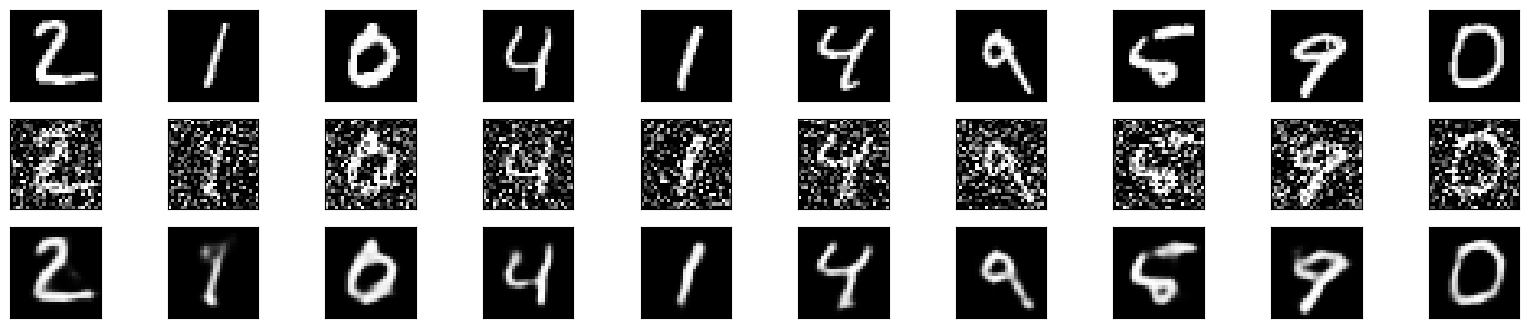

In [ ]:
n = 10
print("Name: PAVITHRA R")
print("Register number: 212222230106")
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test_scaled[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display noisy
    ax = plt.subplot(3, n, i+n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(3, n, i + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()